In [7]:
# -*- coding: utf-8 -*-
"""
example to show how PARAPROBE works and results can be analyzed using Python and Jupyter notebooks
m.kuehbach@mpie.de 2020/01/29
"""
import os, sys, glob, subprocess
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

So let's start a PARAPROBE workflow for a synthetic specimen.

In [8]:
prefix = 'Z:/GITHUB/MPIE_APTFIM_TOOLBOX/paraprobe/examples/solutions/synthetic_polycrystal_00/results/'
print('We load data from' + prefix)

We load data fromZ:/GITHUB/MPIE_APTFIM_TOOLBOX/paraprobe/examples/solutions/synthetic_polycrystal_00/results/


In [9]:
#execute paraprobe-synthetic
#execute paraprobe-ranger

Extract number of atoms in the dataset

In [13]:
h5fn = prefix + 'PARAPROBE.Synthetic.Results.SimID.0.apth5'
hf = h5py.File(h5fn, 'r')
IONTYPES = hf['Ranging/Results/IontypeIDs'][:]
print('There are ' + str(len(IONTYPES[:,0])) + ' ions')

There are 19999893 ions


In [14]:
#execute paraprobe-surfacer
#execute paraprobe-spatstat

Extract nearest-neighbor distribution function

(1, 100000000.0)

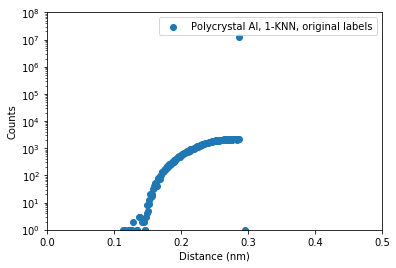

In [22]:
h5fn = prefix + 'PARAPROBE.Spatstat.Results.SimID.0.h5'
hf = h5py.File(h5fn, 'r')
AlOrg = hf['SpatialStatistics/KNN/Results/Task2/Cnts'][:,:]
fig, ax = plt.subplots()
ax.scatter(AlOrg[:,0],AlOrg[:,1])
ax.legend(['Polycrystal Al, 1-KNN, original labels'], loc='upper right')
plt.xlabel('Distance (nm)')
plt.ylabel('Counts')
plt.yscale('log')
plt.xlim([0.0, 0.5])
plt.ylim([1, 1e8])


We have created a synthetic polycrytal composed of individual pristine Al crystals with a = 0.405nm.
For an fcc lattice we expect the nearest neighbor at r'\frac{\sqrt{2}}{2}a'

In [23]:
np.sqrt(2)/2*0.405

0.28637824638055176

Perfect, that's why there is the strongest peak at 0.286. But wait...! We observe pristine lattices so why are there some ions with shorter distances? We should not forget that the polycrystal is composed of Voronoi cells. Individual crystals are created for each lattice and rotated, chopped by their Voronoi cells. Given that we do not relax the structure using molecular dynamics we expect at the boundaries and junctions that some ions are closer to one another then expected.